In [1]:
import os
import joblib
import pickle

import pandas as pd
import numpy as np

from utils_visualize import (
    get_result_table,
    plot_rel_ood_perf,
    plot_raw_ood_perf
)

pd.options.display.max_rows = 100

In [2]:
artifacts_fpath = '/local-scratch/nigam/projects/lguo/temp_ds_shift_robustness/experiments/baseline/artifacts'

#### Setup table and figure parameters

In [3]:
y_axis = {
    'auc':{
        'lim':[-0.18, 0.18],
        'lim_raw':[0.6,.95],
        'label':'AUROC'
    },
    'auprc':{
        'lim':[-0.25, 0.25],
        'lim_raw':[0,.75],
        'label':'AUPRC'
    },
    'ace_abs_logistic_logit':{
        'lim':[-0.01, 0.10],
        'lim_raw':[0,0.15],
        'label':'Calibration'
    },
    'loss_bce':{
        'lim':[0, 0.4],
        'label':'BCE Loss'
    }
}

metrics = {
    'auc':'AUROC',
    'auprc':'AUPRC',
    'ace_abs_logistic_logit':'Calibration',
}

tasks = {
    'hospital_mortality':'In-Hospital Mortality',
    'LOS_7':'LOS > 7 Days',
    'readmission_30':'Readmission in 30 Days',
    'icu_admission':'Admission to ICU'
}

train_years = {
    '2009_2010_2011_2012':'09-12',
    '2010_2011_2012_2013':'10-13',
    '2011_2012_2013_2014':'11-14',
    '2012_2013_2014_2015':'12-15',
    '2013_2014_2015_2016':'13-16',
    '2014_2015_2016_2017':'14-17',
    '2015_2016_2017_2018':'15-18',
}

#### ID Performance

In [4]:
df = get_result_table(artifacts_fpath,train_years,tasks,metrics)
print("ID Performance of Models Trained on Various Year Groups")
display(df)

ID Performance of Models Trained on Various Year Groups


Train Group                                        09-12  \
Task                   Metric                              
In-Hospital Mortality  AUROC        0.821 (0.794, 0.845)   
                       AUPRC         0.094 (0.074, 0.12)   
                       Calibration  0.004 (0.002, 0.006)   
LOS > 7 Days           AUROC        0.751 (0.739, 0.763)   
                       AUPRC        0.445 (0.422, 0.469)   
                       Calibration  0.012 (0.007, 0.018)   
Readmission in 30 Days AUROC         0.754 (0.73, 0.777)   
                       AUPRC        0.225 (0.189, 0.265)   
                       Calibration   0.006 (0.003, 0.01)   
Admission to ICU       AUROC        0.834 (0.816, 0.852)   
                       AUPRC        0.348 (0.303, 0.394)   
                       Calibration  0.008 (0.004, 0.013)   

Train Group                                        10-13  \
Task                   Metric                              
In-Hospital Mortality  AUROC        0.823 (0.798, 0.848)   
                       AUPRC        0.137 (0.104, 0.176)   
                       Calibration  0.004 (0.002, 0.007)   
LOS > 7 Days           AUROC        0.755 (0.743, 0.767)   
                       AUPRC         0.443 (0.42, 0.467)   
                       Calibration  0.006 (0.004, 0.011)   
Readmission in 30 Days AUROC         0.746 (0.725, 0.77)   
                       AUPRC        0.219 (0.185, 0.255)   
                       Calibration  0.009 (0.005, 0.012)   
Admission to ICU       AUROC        0.831 (0.815, 0.848)   
                       AUPRC        0.381 (0.337, 0.422)   
                       Calibration  0.011 (0.006, 0.016)   

Train Group                                        11-14  \
Task                   Metric                              
In-Hospital Mortality  AUROC         0.823 (0.797, 0.85)   
                       AUPRC        0.136 (0.102, 0.179)   
                       Calibration  0.005 (0.003, 0.007)   
LOS > 7 Days           AUROC         0.77 (0.757, 0.781)   
                       AUPRC        0.447 (0.424, 0.472)   
                       Calibration  0.005 (0.003, 0.012)   
Readmission in 30 Days AUROC        0.756 (0.733, 0.777)   
                       AUPRC        0.234 (0.197, 0.271)   
                       Calibration  0.006 (0.003, 0.009)   
Admission to ICU       AUROC        0.841 (0.824, 0.855)   
                       AUPRC        0.396 (0.356, 0.437)   
                       Calibration  0.008 (0.004, 0.012)   

Train Group                                        12-15  \
Task                   Metric                              
In-Hospital Mortality  AUROC        0.816 (0.789, 0.841)   
                       AUPRC         0.119 (0.09, 0.155)   
                       Calibration  0.002 (0.001, 0.005)   
LOS > 7 Days           AUROC         0.78 (0.769, 0.791)   
                       AUPRC        0.444 (0.422, 0.467)   
                       Calibration  0.005 (0.003, 0.011)   
Readmission in 30 Days AUROC        0.773 (0.751, 0.794)   
                       AUPRC        0.244 (0.207, 0.281)   
                       Calibration  0.006 (0.003, 0.009)   
Admission to ICU       AUROC         0.856 (0.841, 0.87)   
                       AUPRC        0.406 (0.363, 0.446)   
                       Calibration  0.005 (0.002, 0.009)   

Train Group                                        13-16  \
Task                   Metric                              
In-Hospital Mortality  AUROC        0.818 (0.791, 0.842)   
                       AUPRC        0.103 (0.078, 0.135)   
                       Calibration  0.004 (0.003, 0.006)   
LOS > 7 Days           AUROC          0.789 (0.779, 0.8)   
                       AUPRC        0.449 (0.427, 0.471)   
                       Calibration  0.005 (0.002, 0.009)   
Readmission in 30 Days AUROC        0.782 (0.762, 0.802)   
                       AUPRC        0.249 (0.214, 0.288)   
                       Calibration  

#### Change in OOD performance relative to ID performance

    Change in OOD performance relative to ID performance of models trained on 09-12


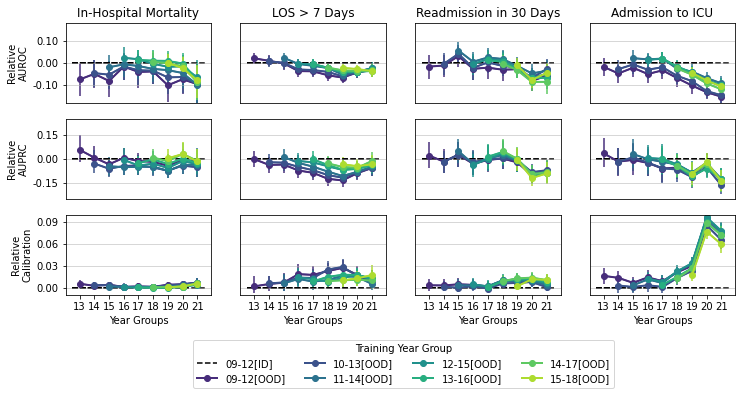

In [6]:
print("\
    Change in OOD performance relative to ID performance of models trained on 09-12\
")
plot_rel_ood_perf(
    artifacts_fpath,
    train_years,
    tasks,
    metrics,
    y_axis,
    legend_bbox_to_anchor=(0.2,-0.5),
    legend_ncols=4
)

#### Raw OOD Performance

    OOD performance of models trained on various year groups
    next to ID performance of 09-12 models and ID performance of
    models trained on each year.


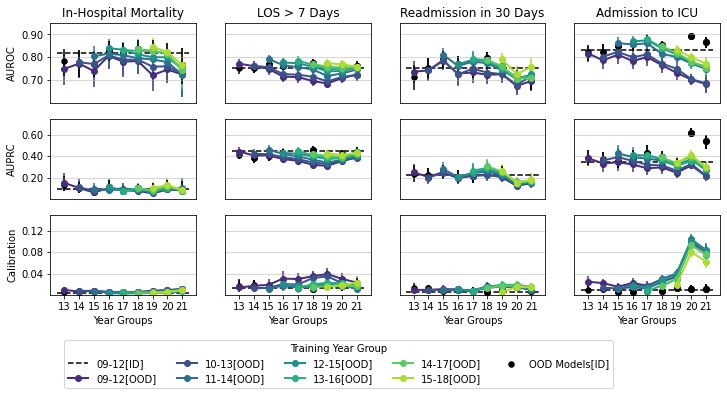

In [7]:
print("\
    OOD performance of models trained on various year groups\n\
    next to ID performance of 09-12 models and ID performance of\n\
    models trained on each year.\
")

plot_raw_ood_perf(
    artifacts_fpath,
    train_years,
    tasks,
    metrics,
    y_axis,
    legend_bbox_to_anchor=(0.3,-0.5),
    legend_ncols=5
)